## **Novel Crossover implementations**
### Testing novel versions of donor_xo

In this notebook we focus on the implementation of 3 versions of donor_xo with changes in the algorithm.\
We focus on testing cases where the algorithm uses **both inflate and deflate mutation are used with crossover**.

In [1]:
#importing
from slim_gsgp.main_slim import slim  # import the slim library
from slim_gsgp.datasets.data_loader import load_airfoil, load_ppb # import the loader for the dataset PPB
from slim_gsgp.evaluators.fitness_functions import rmse  # import the rmse fitness metric
from slim_gsgp.utils.utils import train_test_split, show_individual  # import the train-test split function
from slim_gsgp.utils.utils import generate_random_uniform  # import the mutation step function

In [2]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt

from scipy.stats import wilcoxon

This crossover was previously implemented and will be used as a baseline for future crossover applications.
As a baseline, this crossover recieves 2 individuals and randomly selects which individual is the donor (donates 
random block to reciever) and which is the reciever (recieves 1 random block from the donor, appended to the end).

#### **Testing:**

**Setup:** The setup used for testing the performance of the operators will be the same as used in the paper **"Exploring Non-Bloating Geometric Semantic Genetic Programming"**:

- **Problems**: **Toxicity** (626 features and 274 samples); **Istanbul** (7 features and 536 samples); **Energy** (8 features and 330 samples); **PPB** (626 features and 234 samples); **Concrete** (8 features and 1030 samples) and **Residential Buildings Sales Price (RBSP)** (107 features and 372 samples). 

- **Monte Carlo Crossvalidation** (30 different random partitions into training (70%) and test (30%) sets). All methods did 30 runs, each using one of the 30 partitions.

**Settings:**
- **Initializer:** max_depth = 6, RHH.
- **Function set:** four binary arithmetic operators +, -, *, and / .
- **Terminal set**: contained only the variables of the problem, without any constants.
- **Population size:** 100
- **Nº Generations:** 2000
- **Fitness:** RMSE between predicted and expected output
- **Selection:** Tournament selection of size 2 and elitism (copy the best individual of each population to the next generation).

- **Mutation & Crossover Probabilities:** m=80%, xo =20%, random mutation step drawn uniformly from [0,1].
- max_tree_depth = 17
- For the **Toxicity dataset**, all the variants used inflate/deflate probabilities of 0.1/0.9 and the [0,0.1] interval for the random mutation step. 
- For the **Concrete dataset**, the inflate/deflate probabilities were 0.5/0.5 and the interval of the mutation step was [0, 3]. 
- For the **remaining problems**, the inflate/deflate probabilities were 0.3/0.7 and the interval of the mutation step was [0, 1].

### Donor_gxo:

##### **TOXICITY**:

In [ ]:
#bioavailability?

##### **ISTANBUL:**

In [ ]:
#istanbul

##### **ENERGY:**

In [ ]:
#?

##### **PPB:**

In [ ]:
#Load dataset:
X, y = load_ppb(X_y=True)

# Set the number of splits (30 partitions)
n_splits = 30
test_size = 0.3  # 30% test, 70% train

# Store the rmse results
rmse_list = [] 

# Perform Monte Carlo Cross-Validation with 30 different splits
for i in range(n_splits):
    print(i)
    # Randomly shuffle the dataset and split into training and test sets
    train_test_split(X, y, p_test=0.4)
    X_train, X_test, y_train, y_test =  train_test_split(X, y, p_test=test_size, seed = i)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, p_test=0.5, seed=i)
    
   # Apply the SLIM GSGP algorithm
    for algorithm in ["SLIM+SIG2", "SLIM*SIG2","SLIM+ABS", "SLIM*ABS", "SLIM+SIG1", "SLIM*SIG1"]:
      print(algorithm)

      final_tree = slim(X_train=X_train, y_train=y_train,
                  X_test=X_val, y_test=y_val,
                  dataset_name='ppb', slim_version=algorithm, pop_size=100, n_iter=1000,
                  ms_lower=0, ms_upper=1, p_inflate=0.3, log_path=os.path.join(os.getcwd(),
                                                                "log", f"ppb_donor_xo.csv"),)
      


0
SLIM+SIG2
SLIM*SIG2


**For all algorithm versions:**

In [7]:
ppb_donor_xo= pd.read_csv('log/ppb_donor_xo.csv', names =['slim_version', 'run_id', 'dataset', 'id', 'gens', 'train_fitness', 'time', 'population_node_count', 'test_fitness', 'elite_node_count', 'log'] )
ppb_donor_xo.head()

,slim_version,run_id,dataset,id,gens,train_fitness,time,population_node_count,test_fitness,elite_node_count,log
0,SLIM+SIG2,226b3f46-a768-11ef-ae94-268545ec8968,ppb,74,0,39.966675,0.085593,1340.0,46.968555,15,1
1,SLIM+SIG2,226b3f46-a768-11ef-ae94-268545ec8968,ppb,74,1,39.755234,0.015485,917.0,46.651905,26,1
2,SLIM+SIG2,226b3f46-a768-11ef-ae94-268545ec8968,ppb,74,2,39.609383,0.016460,1012.0,46.447208,37,1
3,SLIM+SIG2,226b3f46-a768-11ef-ae94-268545ec8968,ppb,74,3,39.503742,0.022048,1196.0,46.350449,28,1
4,SLIM+SIG2,226b3f46-a768-11ef-ae94-268545ec8968,ppb,74,4,39.476681,0.020590,1503.0,46.265156,26,1


In [8]:
ppb_donor_xo.drop(['run_id', 'dataset', 'id',  'log'], axis = 1, inplace = True)

In [9]:
ppb_donor_xo.head()

,slim_version,gens,train_fitness,time,population_node_count,test_fitness,elite_node_count
0,SLIM+SIG2,0,39.966675,0.085593,1340.0,46.968555,15
1,SLIM+SIG2,1,39.755234,0.015485,917.0,46.651905,26
2,SLIM+SIG2,2,39.609383,0.016460,1012.0,46.447208,37
3,SLIM+SIG2,3,39.503742,0.022048,1196.0,46.350449,28
4,SLIM+SIG2,4,39.476681,0.020590,1503.0,46.265156,26


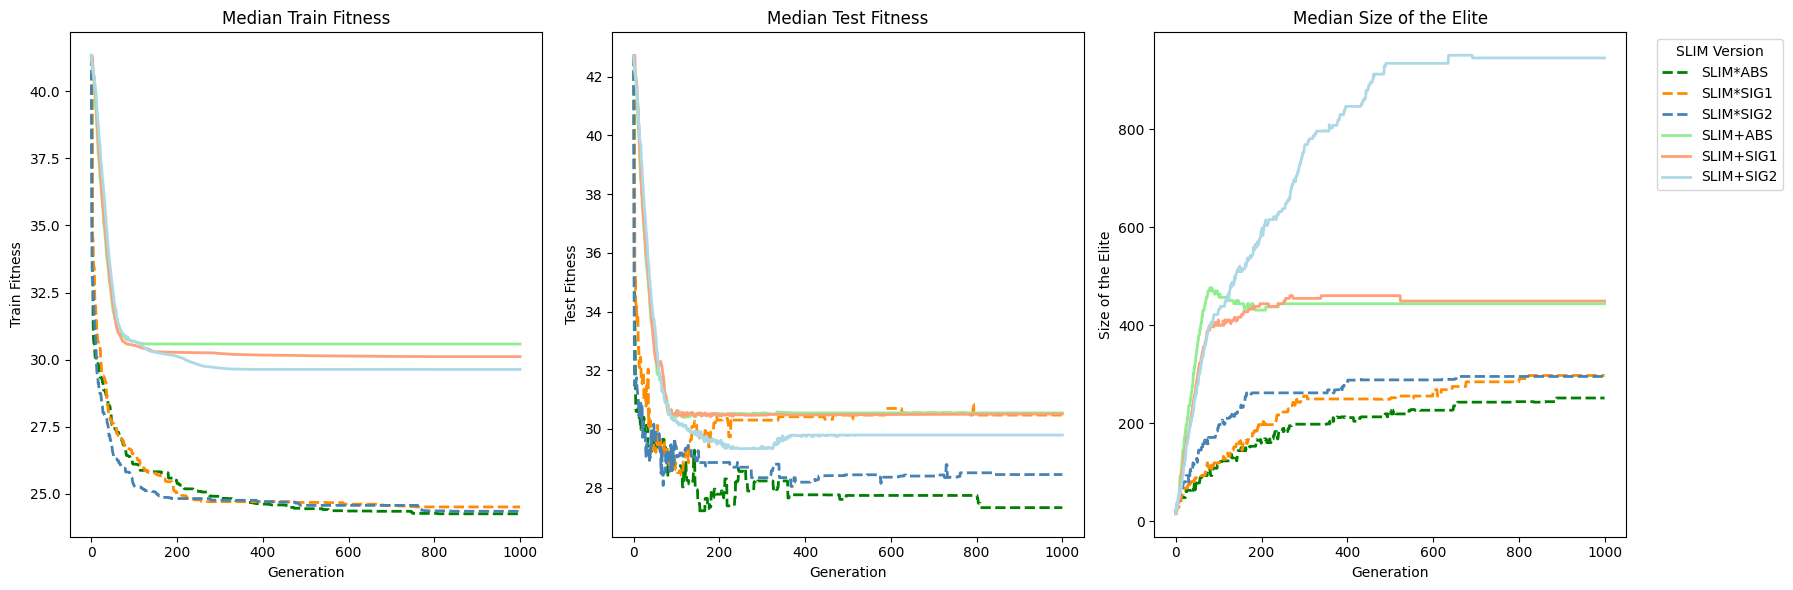

In [ ]:
# Assuming df is your DataFrame, and you've grouped by 'gens' and 'algorithm_version'
df_median_ppb = ppb_donor_xo.groupby(['slim_version','gens']).median().reset_index()

# Custom color and line style dictionaries
custom_colors = {
    "SLIM+SIG2": 'lightblue',
    "SLIM*SIG2": 'steelblue',
    "SLIM+ABS": 'lightgreen',
    "SLIM*ABS": 'green',
    "SLIM+SIG1": 'lightsalmon',
    "SLIM*SIG1": 'darkorange',
}

custom_linestyles = {
    "SLIM+SIG2": '-',
    "SLIM*SIG2": '--',
    "SLIM+ABS": '-',
    "SLIM*ABS": '--',
    "SLIM+SIG1": '-',
    "SLIM*SIG1": '--',
}

# Create a figure with 1 row and 3 columns of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Get the unique algorithm versions
algorithm_versions = df_median_ppb['slim_version'].unique()

# Plot each variable with lines for each algorithm version
for version in algorithm_versions:
    # Filter the data for the specific algorithm version
    version_data = df_median_ppb[df_median_ppb['slim_version'] == version]
    
    # Plot train_fitness vs gens
    axs[0].plot(
        version_data['gens'], 
        version_data['train_fitness'], 
        label=f'{version}', 
        color=custom_colors.get(version, 'black'),  # Default to black if version not in dict
        linestyle=custom_linestyles.get(version, '-'),  # Default to solid line if version not in dict
        linewidth=2
    )
    
    # Plot test_fitness vs gens
    axs[1].plot(
        version_data['gens'], 
        version_data['test_fitness'], 
        label=f'{version}', 
        color=custom_colors.get(version, 'black'), 
        linestyle=custom_linestyles.get(version, '-'),
         linewidth=2
    )
    
    # Plot elite_node_count vs gens
    axs[2].plot(
        version_data['gens'], 
        version_data['elite_node_count'], 
        label=f'{version}', 
        color=custom_colors.get(version, 'black'), 
        linestyle=custom_linestyles.get(version, '-'),
        linewidth=2
    )

# Add titles and labels for each subplot
axs[0].set_title('Median Train Fitness')
axs[0].set_xlabel('Generation')
axs[0].set_ylabel('Train Fitness')

axs[1].set_title('Median Test Fitness')
axs[1].set_xlabel('Generation')
axs[1].set_ylabel('Test Fitness')

axs[2].set_title('Median Size of the Elite')
axs[2].set_xlabel('Generation')
axs[2].set_ylabel('Size of the Elite')

# Add a legend to the last subplot
axs[2].legend(loc='best', title='SLIM Version', bbox_to_anchor=(1.05, 1))

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#Save figure:
my_directory = '/Users/sofiapereira/Desktop/Master Thesis/images/donor_xo'
file_name = os.path.join(my_directory, "donor_xo_ppb.png")
plt.savefig(file_name, dpi=300)  # Save the plot with high resolution
print(f"Plot saved at: {file_name}")

##### **CONCRETE:**

In [ ]:
#concrete_slump

##### **RBSP**

In [ ]:
# resid_build_sale_price

**Thigs that could be tested:**
- N Recievers, instead of 1.
- Donor being the individual with highest selection pressure (best individual).
- Block selection having a principle (see which block allows for the biggest possitive change in fitness?)
- Recievers having blocks added on same index as best individual had?


### Donor_n_gxo

This crossover bases itself on the previous one, but includes N recievers instead of only 1.

##### **Toxicity:**

##### **Istanbul**

In [ ]:
#istanbul

##### **Energy**

##### **PPB**

In [3]:
#Load dataset:
X, y = load_ppb(X_y=True)

# Set the number of splits (30 partitions)
n_splits = 30
test_size = 0.3  # 30% test, 70% train

# Store the rmse results
rmse_list = [] 

# Perform Monte Carlo Cross-Validation with 30 different splits
for i in range(n_splits):
    print(i)
    # Randomly shuffle the dataset and split into training and test sets
    train_test_split(X, y, p_test=0.4)
    X_train, X_test, y_train, y_test =  train_test_split(X, y, p_test=test_size, seed = i)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, p_test=0.5, seed=i)
    
   # Apply the SLIM GSGP algorithm
    for algorithm in ["SLIM+SIG2", "SLIM*SIG2","SLIM+ABS", "SLIM*ABS", "SLIM+SIG1", "SLIM*SIG1"]:
      print(algorithm)

      final_tree = slim(X_train=X_train, y_train=y_train,
                  X_test=X_val, y_test=y_val,
                  dataset_name='ppb', slim_version=algorithm, pop_size=100, n_iter=1000,
                  ms_lower=0, ms_upper=1, p_inflate=0.3, log_path=os.path.join(os.getcwd(),
                                                                "log", f"ppb_donor_n_xo.csv"),)

0
SLIM+SIG2
SLIM*SIG2
SLIM+ABS
SLIM*ABS
SLIM+SIG1
SLIM*SIG1
1
SLIM+SIG2
SLIM*SIG2
SLIM+ABS
SLIM*ABS
SLIM+SIG1
SLIM*SIG1
2
SLIM+SIG2
SLIM*SIG2
SLIM+ABS
SLIM*ABS
SLIM+SIG1
SLIM*SIG1
3
SLIM+SIG2
SLIM*SIG2
SLIM+ABS
SLIM*ABS
SLIM+SIG1
SLIM*SIG1
4
SLIM+SIG2
SLIM*SIG2
SLIM+ABS
SLIM*ABS
SLIM+SIG1
SLIM*SIG1
5
SLIM+SIG2
SLIM*SIG2
SLIM+ABS
SLIM*ABS
SLIM+SIG1
SLIM*SIG1
6
SLIM+SIG2
SLIM*SIG2
SLIM+ABS
SLIM*ABS
SLIM+SIG1
SLIM*SIG1
7
SLIM+SIG2
SLIM*SIG2
SLIM+ABS
SLIM*ABS
SLIM+SIG1
SLIM*SIG1
8
SLIM+SIG2
SLIM*SIG2
SLIM+ABS
SLIM*ABS
SLIM+SIG1
SLIM*SIG1
9
SLIM+SIG2
SLIM*SIG2
SLIM+ABS
SLIM*ABS
SLIM+SIG1
SLIM*SIG1
10
SLIM+SIG2
SLIM*SIG2
SLIM+ABS
SLIM*ABS
SLIM+SIG1
SLIM*SIG1
11
SLIM+SIG2
SLIM*SIG2
SLIM+ABS
SLIM*ABS
SLIM+SIG1
SLIM*SIG1
12
SLIM+SIG2
SLIM*SIG2
SLIM+ABS
SLIM*ABS
SLIM+SIG1
SLIM*SIG1
13
SLIM+SIG2
SLIM*SIG2
SLIM+ABS
SLIM*ABS
SLIM+SIG1
SLIM*SIG1
14
SLIM+SIG2
SLIM*SIG2
SLIM+ABS
SLIM*ABS
SLIM+SIG1
SLIM*SIG1
15
SLIM+SIG2
SLIM*SIG2
SLIM+ABS
SLIM*ABS
SLIM+SIG1
SLIM*SIG1
16
SLIM+SIG2
SLIM*SIG2
SLIM+ABS
SL

**Plots:**

In [4]:
ppb_donor_n_xo = pd.read_csv('log/ppb_donor_n_xo.csv', names =['slim_version', 'run_id', 'dataset', 'id', 'gens', 'train_fitness', 'time', 'population_node_count', 'test_fitness', 'elite_node_count', 'log'] )
ppb_donor_n_xo.head()

,slim_version,run_id,dataset,id,gens,train_fitness,time,population_node_count,test_fitness,elite_node_count,log
0,SLIM+SIG2,84bfd80a-a812-11ef-91a2-268545ec8968,ppb,74,0,39.966675,0.070327,1340.0,46.968555,15,1
1,SLIM+SIG2,84bfd80a-a812-11ef-91a2-268545ec8968,ppb,74,1,39.966675,0.059160,1001.0,46.968555,15,1
2,SLIM+SIG2,84bfd80a-a812-11ef-91a2-268545ec8968,ppb,74,2,39.877953,0.004432,1177.0,46.875732,26,1
3,SLIM+SIG2,84bfd80a-a812-11ef-91a2-268545ec8968,ppb,74,3,39.665844,0.004823,1764.0,46.556938,37,1
4,SLIM+SIG2,84bfd80a-a812-11ef-91a2-268545ec8968,ppb,74,4,39.510311,0.005995,2983.0,46.327801,48,1


In [5]:
ppb_donor_n_xo.drop(['run_id', 'dataset', 'id',  'log'], axis = 1, inplace = True)

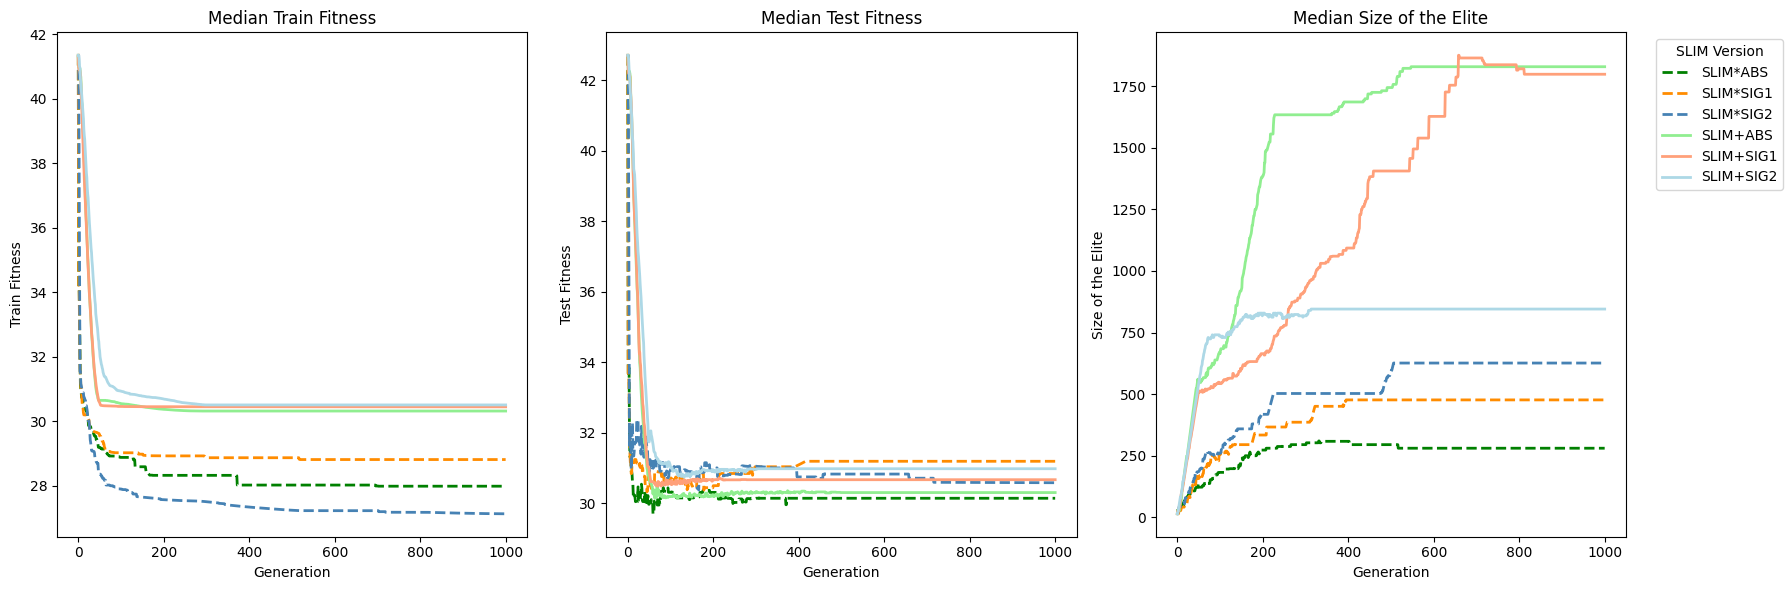

In [6]:
# Assuming df is your DataFrame, and you've grouped by 'gens' and 'algorithm_version'
df_median_ppb = ppb_donor_n_xo.groupby(['slim_version','gens']).median().reset_index()

# Custom color and line style dictionaries
custom_colors = {
    "SLIM+SIG2": 'lightblue',
    "SLIM*SIG2": 'steelblue',
    "SLIM+ABS": 'lightgreen',
    "SLIM*ABS": 'green',
    "SLIM+SIG1": 'lightsalmon',
    "SLIM*SIG1": 'darkorange',
}

custom_linestyles = {
    "SLIM+SIG2": '-',
    "SLIM*SIG2": '--',
    "SLIM+ABS": '-',
    "SLIM*ABS": '--',
    "SLIM+SIG1": '-',
    "SLIM*SIG1": '--',
}

# Create a figure with 1 row and 3 columns of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Get the unique algorithm versions
algorithm_versions = df_median_ppb['slim_version'].unique()

# Plot each variable with lines for each algorithm version
for version in algorithm_versions:
    # Filter the data for the specific algorithm version
    version_data = df_median_ppb[df_median_ppb['slim_version'] == version]
    
    # Plot train_fitness vs gens
    axs[0].plot(
        version_data['gens'], 
        version_data['train_fitness'], 
        label=f'{version}', 
        color=custom_colors.get(version, 'black'),  # Default to black if version not in dict
        linestyle=custom_linestyles.get(version, '-'),  # Default to solid line if version not in dict
        linewidth=2
    )
    
    # Plot test_fitness vs gens
    axs[1].plot(
        version_data['gens'], 
        version_data['test_fitness'], 
        label=f'{version}', 
        color=custom_colors.get(version, 'black'), 
        linestyle=custom_linestyles.get(version, '-'),
         linewidth=2
    )
    
    # Plot elite_node_count vs gens
    axs[2].plot(
        version_data['gens'], 
        version_data['elite_node_count'], 
        label=f'{version}', 
        color=custom_colors.get(version, 'black'), 
        linestyle=custom_linestyles.get(version, '-'),
        linewidth=2
    )

# Add titles and labels for each subplot
axs[0].set_title('Median Train Fitness')
axs[0].set_xlabel('Generation')
axs[0].set_ylabel('Train Fitness')

axs[1].set_title('Median Test Fitness')
axs[1].set_xlabel('Generation')
axs[1].set_ylabel('Test Fitness')

axs[2].set_title('Median Size of the Elite')
axs[2].set_xlabel('Generation')
axs[2].set_ylabel('Size of the Elite')

# Add a legend to the last subplot
axs[2].legend(loc='best', title='SLIM Version', bbox_to_anchor=(1.05, 1))

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


**Statistical Tests: Willcoxon rank-sum test**

**For RMSE at termination:**

In [ ]:
rmse_donor_xo = ....
rmse_donor_n_xo = ....

In [ ]:
wilcoxon(rmse_donor_xo, rmse_donor_n_xo)

**For model size at termination:**

In [ ]:
elite_size_donor_xo = .....
elite_size_donor_n_xo = ....

In [ ]:
wilcoxon(elite_size_donor_xo, elite_size_donor_n_xo)

##### **Concrete**

### best_donor_gxo:

This crossover considered the best individual as the donor and donates to 1 reciever.

##### **Toxicity:**

##### **Istanbul**

##### **Energy**

##### **PPB**

##### **Concrete**

### best_donor_n_gxo:

This crossover considered the best individual as the donor and donates to n recievers.

##### **Toxicity:**

##### **Istanbul**

##### **Energy**

##### **PPB**

##### **Concrete**